
  Activation Function: IDENTITY 
Input: [0 0], Output: -0.4615
Input: [2 1], Output: 0.6462
Input: [3 0], Output: 0.9000
Input: [4 1], Output: 1.5538

  Activation Function: SIGMOID 
Input: [0 0], Output: 0.0000
Input: [2 1], Output: 0.0575
Input: [3 0], Output: 0.0500
Input: [4 1], Output: 0.9399

  Activation Function: TANH 
Input: [0 0], Output: -0.4090
Input: [2 1], Output: 0.5874
Input: [3 0], Output: 0.6767
Input: [4 1], Output: 0.9073


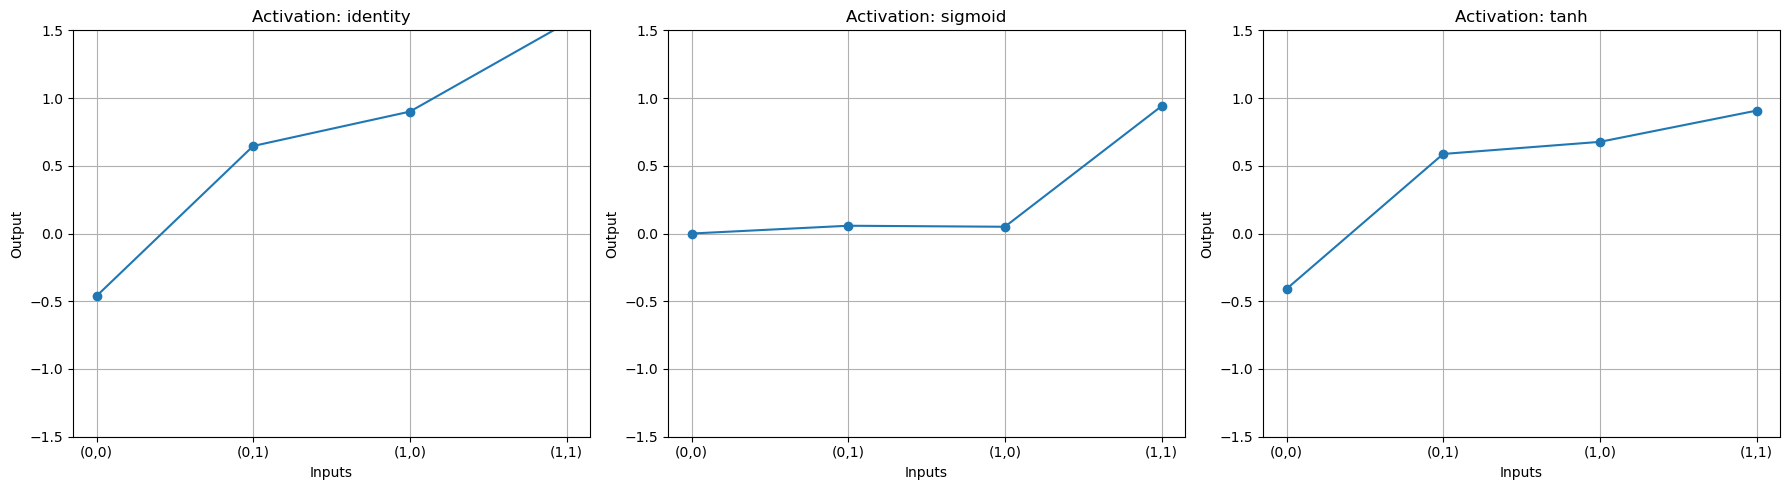

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def identity(x):
    return x

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

class Perceptron:
    def __init__(self, input_size, activation='identity', learning_rate=0.1, epochs=100):
        self.weights = np.zeros(input_size + 1)  
        self.learning_rate = learning_rate
        self.epochs = epochs
    
        if activation == 'identity':
            self.activation = identity
        elif activation == 'sigmoid':
            self.activation = sigmoid
        elif activation == 'tanh':
            self.activation = tanh
        else:
            raise ValueError("Unsupported activation function")
        self.activation_name = activation

    def predict(self, x):
        x = np.insert(x, 0, 1)  
        z = np.dot(self.weights, x)
        return self.activation(z)

    def train(self, X, y):
        for epoch in range(self.epochs):
            for xi, target in zip(X, y):
                xi_aug = np.insert(xi, 0, 1)  
                z = np.dot(self.weights, xi_aug)
                output = self.activation(z)
                error = target - output
                self.weights += self.learning_rate * error * xi_aug

X = np.array([
    [0, 0],
    [2, 1],
    [3, 0],
    [4, 1]
])
y = np.array([0, 0, 0, 1]) 
input_labels = ['(0,0)', '(0,1)', '(1,0)', '(1,1)']
x_pos = range(len(input_labels))

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

activations = ['identity', 'sigmoid', 'tanh']

for i, activation_function in enumerate(activations):
    perceptron = Perceptron(input_size=2, activation=activation_function, learning_rate=0.1, epochs=1000)
    perceptron.train(X, y)
    outputs = [perceptron.predict(xi) for xi in X]

    print(f"\n  Activation Function: {activation_function.upper()} ")
    for xi, output in zip(X, outputs):
        print(f"Input: {xi}, Output: {output:.4f}")

    axs[i].plot(x_pos, outputs, marker='o', linestyle='-', color='tab:blue')
    axs[i].set_title(f"Activation: {activation_function}")
    axs[i].set_xticks(x_pos)
    axs[i].set_xticklabels(input_labels)
    axs[i].set_ylim([-1.5, 1.5])
    axs[i].set_xlabel('Inputs')
    axs[i].set_ylabel('Output')
    axs[i].grid(True)

plt.tight_layout()
plt.show()
